# Выбор локации для скважины

# Цель

Выбрать среди регионов со множеством скважин потенциально самый прибыльный, исходя из данных об объёмах скважин


# Содержание

1. Загрузка и подготовка данных
2. Обучение и проверка модели
3. Подготовка к расчёту прибыли
4. Расчёт прибыли и рисков
 - 4.1. Расчёт максимально возможной прибыли в регионах
 - 4.2. Расчёт прибыли с учётом рисков
 
Решаем задачу регрессии с помощью машинного обучения с учителем

## Загрузка и подготовка данных

Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import scipy as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

state = np.random.RandomState(12345)

Прочитаем данные по трём регионам и изучим их

In [ ]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
data_0.duplicated().sum()

0

Как видно из данных, в таблице есть столбец с id скважины, который необходимо удалить, так как он мешает использованию модели регрессии и в целом никак не повлияет на результат расчётов

<div class="alert alert-block alert-success">
<b>Успех:</b> Согласен
</div>


In [ ]:
data_0 = data_0.drop(columns=['id'], axis=1)

Посмотрим на графики распределения численных признаков. Видно, что в данных нет никаких выбросов, а значит масштабировать их не имеет смысла

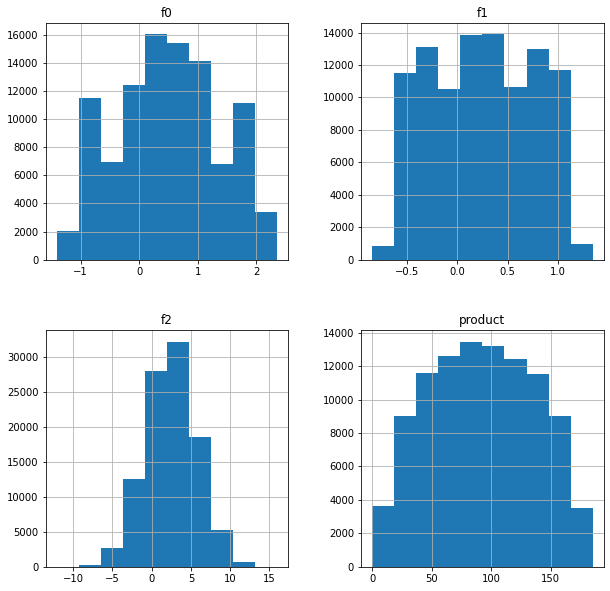

In [ ]:
data_0.hist(figsize=(10, 10));

In [ ]:
data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [ ]:
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
data_1.duplicated().sum()

0

In [ ]:
data_1 = data_1.drop(columns=['id'], axis=1)

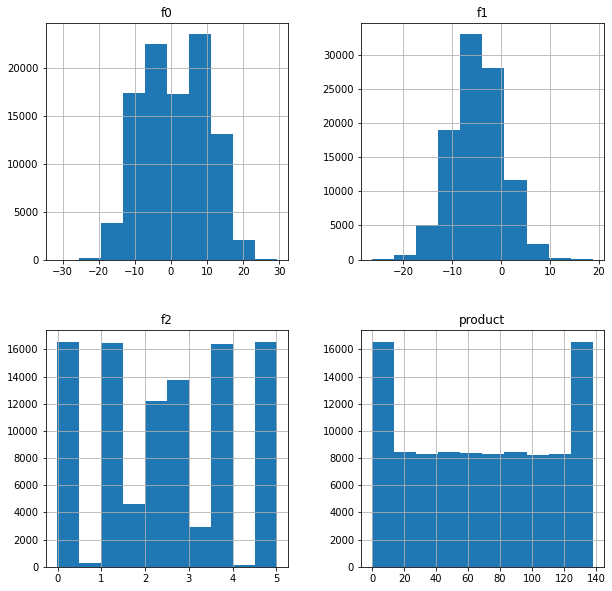

In [ ]:
data_1.hist(figsize=(10, 10));

Видно, что в данном датасете 2 признака распределены ненормально. Так как данные синтетические, разбираться в причинах такого распределения тоже не станем

In [ ]:
data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


Видим, что очень сильная корреляция между признаками f2 и product. Это говорит о том, что предсказания по этой модели будут, скорее всего, ненадёжными. Возможно, один из признаков был искусственно получен из другого

In [ ]:
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
data_2.duplicated().sum()

0

In [ ]:
data_2 = data_2.drop(columns=['id'], axis=1)

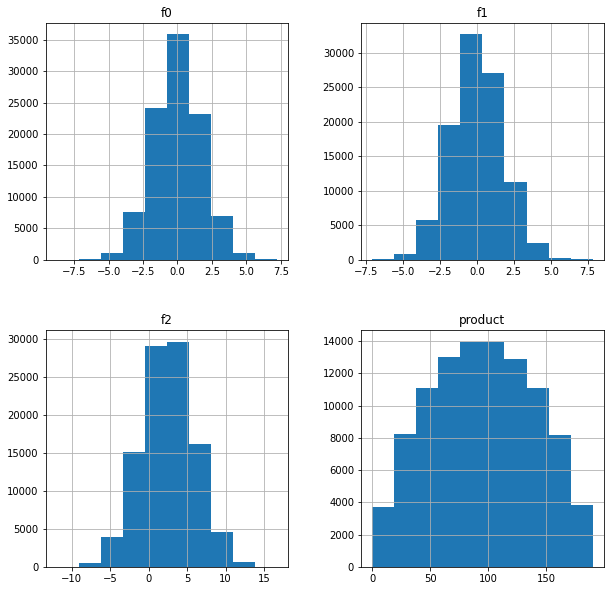

In [ ]:
data_2.hist(figsize=(10, 10));

In [ ]:
data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


После изучения и обработки данных, можем приступить к обучению моделей

## Обучение и проверка модели

Выделим признаки и целевой признак в каждом из датасетов, разобьём на выборки, затем обучим модели и посчитаем средний запас предсказанного сырья (в тыс баррелей) и среднюю ошибку

In [ ]:
features_0 = data_0.drop(columns=['product'], axis=1)
target_0 = data_0['product']

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=state)

model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predictions_0 = model_0.predict(features_valid_0)
print('Средний запас предсказанного сырья в первом регионе:', predictions_0.mean())
rmse_0 = mean_squared_error(target_valid_0, predictions_0, squared=False)
print('Средняя ошибка в первом регионе:', rmse_0)

Средний запас предсказанного сырья в первом регионе: 92.59256778438035
Средняя ошибка в первом регионе: 37.5794217150813


In [ ]:
features_1 = data_1.drop(columns=['product'], axis=1)
target_1 = data_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=state)

model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predictions_1 = model_1.predict(features_valid_1)
print('Средний запас предсказанного сырья во втором регионе:', predictions_1.mean())
rmse_1 = mean_squared_error(target_valid_1, predictions_1, squared=False)
print('Средняя ошибка во втором регионе:', rmse_1)

Средний запас предсказанного сырья во втором регионе: 68.76995145799754
Средняя ошибка во втором регионе: 0.889736773768065


In [ ]:
features_2 = data_2.drop(columns=['product'], axis=1)
target_2 = data_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=state)

model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_2 = model_2.predict(features_valid_2)
print('Средний запас предсказанного сырья в третьем регионе:', predictions_2.mean())
rmse_2 = mean_squared_error(target_valid_2, predictions_2, squared=False)
print('Средняя ошибка в третьем регионе:', rmse_2)

Средний запас предсказанного сырья в третьем регионе: 95.087528122523
Средняя ошибка в третьем регионе: 39.958042459521614


Исходя из расчётов, самый большой запас сырья в третьем регионе, а самый маленький - во втором

## Подготовка к расчёту прибыли

Переведём данные в Series, так как это необходимо для дальнейших вычислений

In [ ]:
target_valid_0 = pd.Series(target_valid_0)
target_valid_1 = pd.Series(target_valid_1)
target_valid_2 = pd.Series(target_valid_2)

predictions_0 = pd.Series(predictions_0, index=target_valid_0.index)
predictions_1 = pd.Series(predictions_1, index=target_valid_1.index)
predictions_2 = pd.Series(predictions_2, index=target_valid_2.index)

Рассчитаем необходимый минимум баррелей для достижения точки безубыточности. Для этого введём переменные бюджета и дохода с 1 барреля нефти со значенями, которые заданы в условии

In [ ]:
# суммы указаны в млн рублей
BUDGET = 10_000
INCOME_PER_UNIT = 0.45
COUNT = 200

MIN_BARRELS = BUDGET / INCOME_PER_UNIT / COUNT
print('Минимальный объём сырья (в тыс. баррелей) для достижения безубыточности:', MIN_BARRELS)

Минимальный объём сырья (в тыс. баррелей) для достижения безубыточности: 111.11111111111111


In [ ]:
print('Средний запас сырья в первом регионе без учёта необходимого минимума:', predictions_0.mean() - MIN_BARRELS)
print('Средний запас сырья во втором регионе без учёта необходимого минимума:', predictions_1.mean() - MIN_BARRELS)
print('Средний запас сырья в третьем регионе без учёта необходимого минимума:', predictions_2.mean() - MIN_BARRELS)

Средний запас сырья в первом регионе без учёта необходимого минимума: -18.518543326730764
Средний запас сырья во втором регионе без учёта необходимого минимума: -42.34115965311358
Средний запас сырья в третьем регионе без учёта необходимого минимума: -16.023582988588117


Для достижения безубыточности необходимо добыть 111.112 тысяч баррелей нефти. По расчётам видно, что среднего запаса сырья не хватает ни в одном из регионов. Посмотрим, как обстоят дела в целом по регионам

In [ ]:
data_list = [data_0, data_1, data_2]
for data in data_list:
    print(data['product'].describe())
    print()

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64



Мы видим, что в 1 и 3 регионах третий квартиль больше, чем наша точка безубыточности. А значит в этих регионах больше 25% скважин подходят для достижения безубыточности. Во втором регионе третий квартиль не дотягивает до минимально необходимого запаса сырья, но максимум в этом регионе превосходит необходимое значение, поэтому этот регион стоит рассмотреть в качестве потенциально прибыльного

## Расчёт прибыли и рисков 

### Расчёт максимально возможной прибыли в регионах

Создадим функцию для расчёта прибыли, которая принимает предсказанные объёмы скважин, доход с 1 барреля, количество скважин для разработки, и бюджет на затраты

In [ ]:
def profit_calculation(target, predictions):
    predict_sorted = predictions.sort_values(ascending=False)
    max_values_real = target[predict_sorted.index][:COUNT]
    total_profit = (max_values_real.sum() * INCOME_PER_UNIT) - BUDGET    
    return total_profit

Посчитаем максимально возможную прибыль по нашим предсказаниям в трёх регионах

In [ ]:
profit_0 = profit_calculation(target_valid_0, predictions_0)
print('Максимально возможная прибыль для первого региона (в млн рублей):', profit_0)

Максимально возможная прибыль для первого региона (в млн рублей): 3320.8260431398503


In [ ]:
profit_1 = profit_calculation(target_valid_1, predictions_1)
print('Максимально возможная прибыль для второго региона (в млн рублей):', profit_1)

Максимально возможная прибыль для второго региона (в млн рублей): 2415.086696681512


In [ ]:
profit_2 = profit_calculation(target_valid_2, predictions_2)
print('Максимально возможная прибыль для третьего региона (в млн рублей):', profit_2)

Максимально возможная прибыль для третьего региона (в млн рублей): 2539.9159458429476


Как видим, максимально возможная прибыль, исходя из наших предсказаний, больше всего в первом регионе

### Расчёт прибыли с учётом рисков

Рассчитаем распределение прибыли и среднюю прибыль для 500 скважин

In [ ]:
def bootstrap(target_valid, predictions):
    values = []
    for i in range(1000):
        target_subsample = target_valid.sample(n=500, replace=True, random_state=state)
        predict_subsample = predictions[target_subsample.index]
        values.append(profit_calculation(target_subsample, predict_subsample))

    values = pd.Series(values)

    lower = values.quantile(q=0.025)
    upper = values.quantile(q=0.975)
    
    loss_values = []
    for i in range(len(values)):
        if values[i] < 0:
            loss_values.append(i)
    return (print('Распределение прибыли для региона (в млн рублей): от', lower, 'до', upper),
            print('Средняя прибыль для региона (в млн рублей):', values.mean()),
            print('Риск убытков в регионе (в млн рублей)', (len(loss_values) / len(values)) * 100, '%'))

In [ ]:
bootstrap(target_valid_0, predictions_0)

Распределение прибыли для региона (в млн рублей): от -76.18781389036307 до 957.8465319517837
Средняя прибыль для региона (в млн рублей): 423.8972379169057
Риск убытков в регионе (в млн рублей) 4.8 %


(None, None, None)

In [ ]:
bootstrap(target_valid_1, predictions_1)

Распределение прибыли для региона (в млн рублей): от 108.06689523396285 до 928.5744392324966
Средняя прибыль для региона (в млн рублей): 513.2566989172611
Риск убытков в регионе (в млн рублей) 0.6 %


(None, None, None)

In [ ]:
bootstrap(target_valid_2, predictions_2)

Распределение прибыли для региона (в млн рублей): от -142.8006300878674 до 893.3805657503997
Средняя прибыль для региона (в млн рублей): 381.1203595759018
Риск убытков в регионе (в млн рублей) 7.3999999999999995 %


(None, None, None)

Исходя из вычислений, мы видим, что наилучшее распределение прибыли у 2 региона. Также во 2 регионе самая больша средняя прибыль. В двух других регионах вероятность убытков выше, чем требуется по условию, а значит их нам нужно откинуть. Таким образом, лучшим регионом для разработки скважин является второй